ワインの判定

まずはワインデータをダウンロード

In [3]:
import urllib.request as req
import pandas as pd

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
savefile = "winequality-wine.csv"
req.urlretrieve(url, savefile)
print("save complete")

df = pd.read_csv(savefile, sep=";", encoding = "utf-8")
df

save complete


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6


wine.sample.py

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#データを読み込む
wine = pd.read_csv("winequality-wine.csv", sep=";", encoding="utf-8")

#データをラベルとデータに分離
y = wine["quality"]
x = wine.drop("quality", axis=1)

#学習用とテスト用に分割する
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#学習する
model = RandomForestClassifier()
model.fit(x_train, y_train)

#評価する
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("正答率 =", accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         3
          4       0.58      0.27      0.37        26
          5       0.69      0.68      0.68       303
          6       0.65      0.76      0.70       432
          7       0.70      0.54      0.61       178
          8       0.82      0.51      0.63        35
          9       0.00      0.00      0.00         3

avg / total       0.67      0.67      0.66       980

正答率 = 0.6704081632653062


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
この正答率はあまり精度がよくないため元のデータを分析してみる

In [0]:
cout_wine_data.py

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


<function matplotlib.pyplot.show>

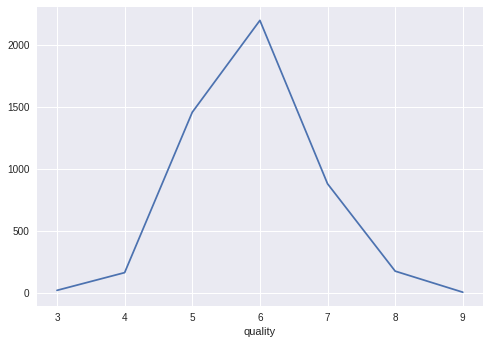

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

#ワインデータの読み込み
wine = pd.read_csv("winequality-wine.csv", sep=";", encoding="utf-8")

#品質データごとにグループ分けして、その数を数える
count_data = wine.groupby('quality')["quality"].count()
print (count_data)

#グラフ
count_data.plot()
plt.show

データを分析してみると、5から7が大半であり、2以下と10は存在していない「不均衡データ」であることが分かった
よってラベルを3段階に分けて学習させてみる

wine_mod_label.py

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


wine = pd.read_csv("winequality-wine.csv", sep=";", encoding="utf-8")


y = wine["quality"]
x = wine.drop("quality", axis=1)


#ラベルを付けなおす
newlist = []
for v in list(y):
  if v <= 4:
    newlist += [0]
  elif v <= 7:
    newlist += [1]
  else:
    newlist += [2]
y = newlist


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


model = RandomForestClassifier()
model.fit(x_train, y_train)


y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("正答率 =", accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.57      0.40      0.47        40
          1       0.95      0.99      0.97       902
          2       1.00      0.37      0.54        38

avg / total       0.94      0.94      0.93       980

正答率 = 0.9387755102040817
